In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('dataset.csv')             # reading the file
df.head() 

,0,1,2,3,4,5,6,7,8,target
0,7.547600,0.151261,557.132466,354.008599,0.301029,55.282594,9635.211683,2,1,9461.469590
1,3.140491,0.794497,837.116189,104.515773,0.110622,88.516243,9425.041942,2,5,10257.271940
2,2.064447,0.236500,313.757354,259.127993,0.729964,88.350465,9115.661199,1,5,8719.214483
3,9.099262,0.453953,661.409826,466.070226,0.432750,21.516152,9584.310016,3,2,9165.197338
4,5.264564,0.683869,344.154511,485.441053,0.085599,90.308205,9193.271575,2,1,9458.427537


In [3]:
df.shape              # size of the dataset

(900, 10)

In [4]:
X = df.drop('target', axis=1)                            
y= df['target']

## Assumptions For linear Regression

#####  No autocorrelation

In [5]:
import statsmodels.api as sm

In [6]:
X_constant = sm.add_constant(X)

In [7]:
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     480.1
Date:                Mon, 29 Jun 2020   Prob (F-statistic):               0.00
Time:                        15:04:19   Log-Likelihood:                -6554.8
No. Observations:                 900   AIC:                         1.313e+04
Df Residuals:                     890   BIC:                         1.318e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        945.6542    403.460      2.344      0.019     153.810    1737.498
0             14.6516      4.129      3.549      0.000       6.548      22.755
1            224.9913     40.911      5.500      0.000     144.698     305.284
2              1.0349      0.041     25.360      0.000       0.955       1.115
3              0.0176      0.101      0.174      0.862      -0.181       0.216
4          -1951.9405     41.593    -46.930      0.000   -2033.572   -1870.309
5              0.8310      0.416      1.999      0.046       0.015       1.647
6              0.9953      0.042     23.654      0.000       0.913       1.078
7           -523.1573     15.103    -34.640      0.000    -552.798    -493.516
8             -2.9849      7.073     -0.422      0.673     -16.866      10.896
==============================================================================
Omnibus:                       12.115   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                8.059
Skew:                          -0.080   Prob(JB):                       0.0178
Kurtosis:                       2.565   Cond. No.                     3.26e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**we know that For a good linear model, it should have low or no autocorrelation i.e the value equals to 2 or nearly equals to 2.**

From above we can see that Durbin-Watson value is 2.073 that means it has low negative autocorrelation.

##### Linearity of residuals

#### Rainbow test 

In [8]:
sm.stats.diagnostic.linear_rainbow(res=lin_reg, frac=0.5)

(0.9930566545083448, 0.5294154950146464)

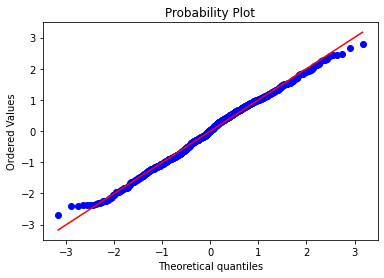

In [9]:
import scipy.stats as stats
import pylab
from statsmodels.graphics.gofplots import ProbPlot
st_residual = lin_reg.get_influence().resid_studentized_internal
stats.probplot(st_residual, dist="norm", plot = pylab)
plt.show()

In [10]:
lin_reg.resid.mean()

4.09060400367404e-11

Very much close to zero. 4.090 * 10^(-14)

So, linearity is present.

#####   NO  MULTI COLLINEARITY

In [11]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,0,1,2,3,4,5,6,7,8
vif,1.005835,1.007547,1.006882,1.003858,1.014317,1.018891,1.016784,1.017222,1.008834


**The values are nearly equal to 1 that means there is no multi coliniarity.**

#### checking the distribution of the features

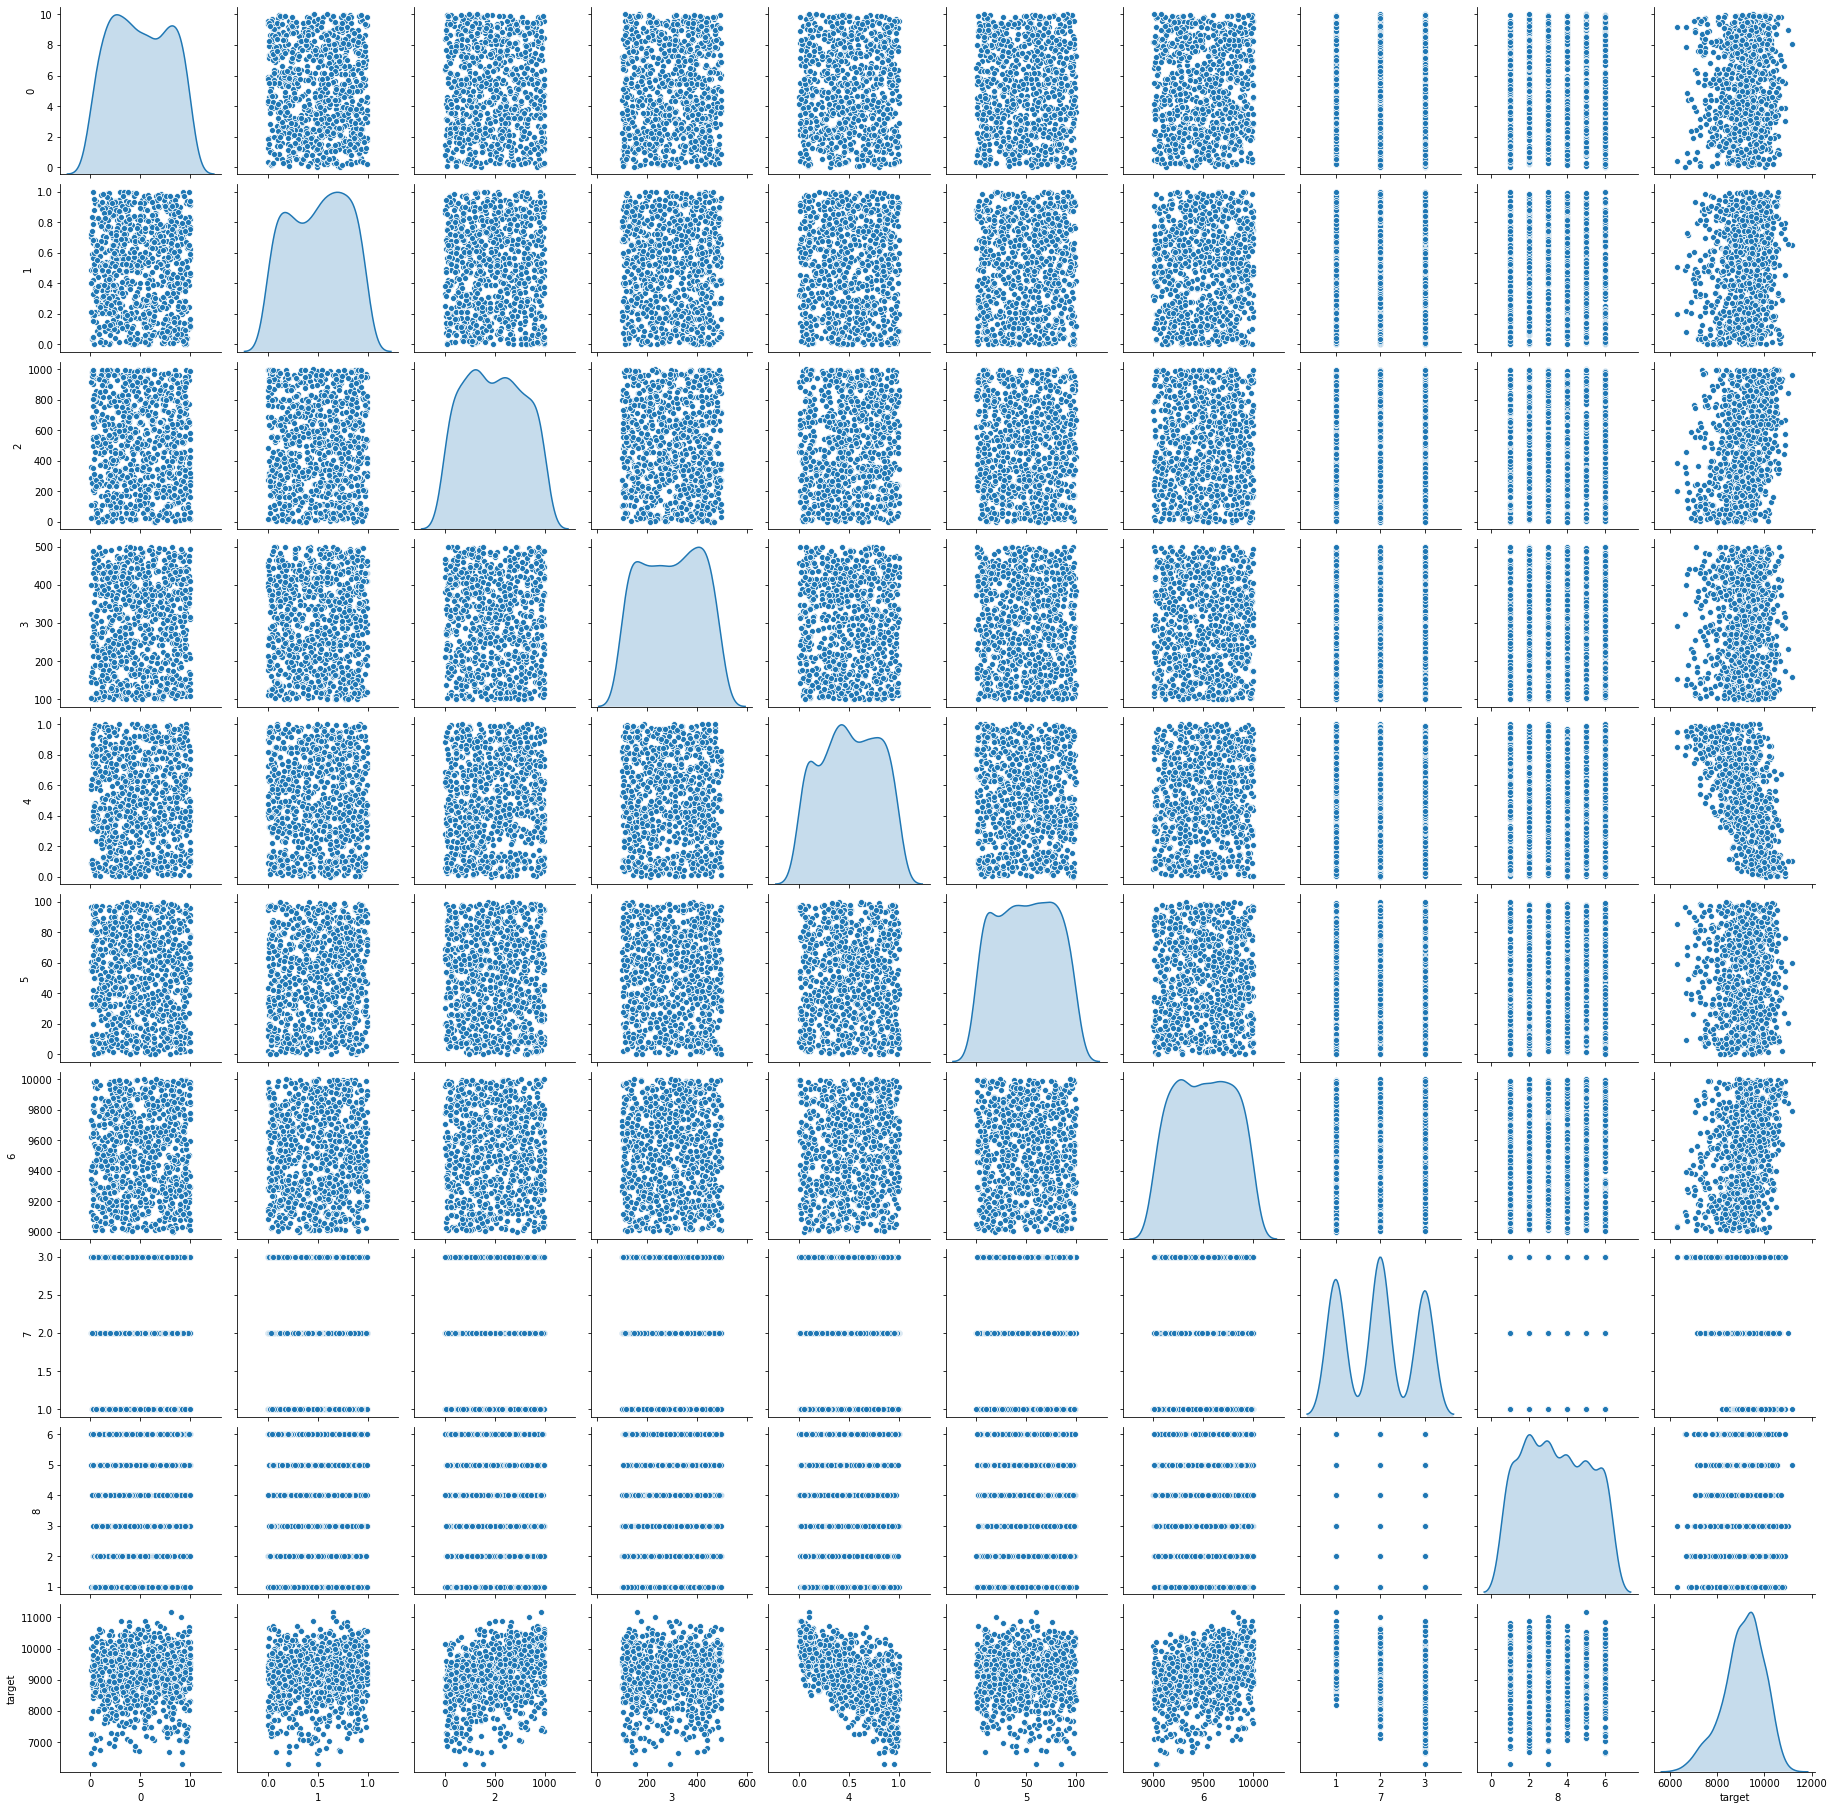

In [12]:
sns.pairplot(df,diag_kind='kde') 

all features seems to be a gaussian distribution so no further transformation is required

In [13]:
#### fitting base model  

In [14]:
#we are taking linear regression because it satisfing all the assumptions and it performs well where 
#independent features are mostly continuos features.


from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

In [15]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, X, y, cv=5)
scores.mean()

0.8202384605054306

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 10)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 10)

model = lin_reg.fit(X_train,y_train)
print(f'R^2 score for train: {lin_reg.score(X_train, y_train)}')
print(f'R^2 score for test: {lin_reg.score(X_test, y_test)}')

R^2 score for train: 0.8202348795973544
R^2 score for test: 0.8423646564146937


### Feature Selection

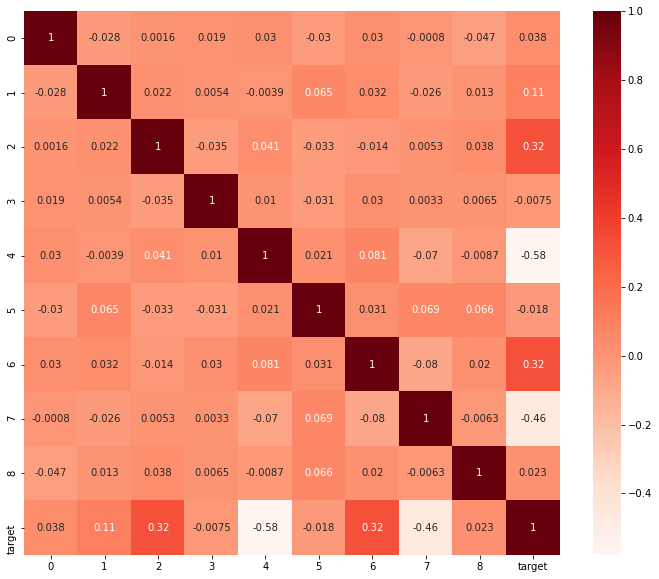

In [18]:
plt.figure(figsize=(12,10))                                #checking corelation by using heat map
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [19]:
cor_target = abs(cor["target"])                             
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

4         0.578062
target    1.000000
Name: target, dtype: float64

#### Backward Elimination

In [20]:
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['0', '1', '2', '4', '5', '6', '7']


#### applying model with fetures from backward elimination

In [21]:
X = df.drop(['target','3','8'], axis=1)
y= df['target']
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, X, y, cv=5)
print('cross val score- ',scores.mean())

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 10)
model = lin_reg.fit(X_train,y_train)

print(f'R^2 score for train: {lin_reg.score(X_train, y_train)}')
print(f'R^2 score for test: {lin_reg.score(X_test, y_test)}')

cross val score-  0.8206088005210284
R^2 score for train: 0.8200469607353165
R^2 score for test: 0.8432969037400012


#### Recursive Feature Elimination

In [22]:
from sklearn.feature_selection import RFE
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 10)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['0', '1', '2', '4', '5', '6', '7'], dtype='object')


#### we got same features in rfe and backward elimination

#### LassoCV

In [23]:
X=df.drop(['target'], axis=1)
y= df['target']

from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 78.887966
Best score using built-in LassoCV: 0.696084


In [24]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 7 variables and eliminated the other 2 variables


In [25]:
coef

0      1.473125
1      0.000000
2      0.993321
3     -0.000418
4   -948.485073
5      0.328476
6      0.958572
7   -372.739478
8     -0.000000
dtype: float64

#### applying model to selected features from Lasso

In [26]:
X = df.drop(['target','1','8'], axis=1)
y= df['target']
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, X, y, cv=5)
print('cross val score- ',scores.mean())

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 10)
model = lin_reg.fit(X_train,y_train)

print(f'R^2 score for train: {lin_reg.score(X_train, y_train)}')
print(f'R^2 score for test: {lin_reg.score(X_test, y_test)}')

cross val score-  0.8147083349514272
R^2 score for train: 0.81645026534933
R^2 score for test: 0.8334493600537078


features from backward elimination and rfe, are getting training score as 82.00% and testing score as 84.32 and cross validation score is 82.06%.
there is slightly overfitting but we can consider this model because the difference between training and testing score is 2% that is negligible so we will take this as the final model.

#### hyperparameter tunning

In [27]:
from sklearn.model_selection import GridSearchCV
params = {
    'fit_intercept':['True', 'False'],
    'normalize':['True', 'False'],
    'copy_X':['True', 'False']
}
lr_gs = GridSearchCV(lin_reg, params, cv=3, verbose=1).fit(X, y)
print ("Best Params", lr_gs.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Params {'copy_X': 'True', 'fit_intercept': 'True', 'normalize': 'True'}


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.2s finished


In [28]:
lin_reg=LinearRegression(copy_X= True, fit_intercept= True, normalize=True,n_jobs=-1)

In [29]:
X = df.drop(['target','3','8'], axis=1)
y= df['target']
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(copy_X= True, fit_intercept= True, normalize=True,n_jobs=-1)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, X, y, cv=5)
print('cross val score- ',scores.mean())

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 10)
model = lin_reg.fit(X_train,y_train)

print(f'R^2 score for train: {lin_reg.score(X_train, y_train)}')
print(f'R^2 score for test: {lin_reg.score(X_test, y_test)}')

cross val score-  0.8206088005210352
R^2 score for train: 0.8200469607353167
R^2 score for test: 0.8432969037400202


## Prediction

In [30]:
df2=pd.read_csv('prediction.csv')
df2.head()

,0,1,2,3,4,5,6,7,8
0,8.243945,0.442707,814.191463,437.449497,0.820757,66.358208,9321.584760,1,5
1,0.450469,0.734878,690.536337,337.971868,0.163483,88.966042,9653.465215,2,3
2,5.805761,0.412531,225.544432,468.295427,0.254678,27.853712,9840.535247,2,3
3,4.126340,0.685302,73.330815,169.578438,0.828849,81.691968,9044.806270,2,5
4,8.082666,0.449977,526.274384,308.148895,0.737136,30.420377,9916.538668,1,5


In [31]:
lin_reg = LinearRegression(copy_X= True, fit_intercept= True, normalize=True,n_jobs=-1)
final_model=lin_reg.fit(X,y)

In [32]:
p=final_model.predict(df2.drop(['3','8'], axis=1))

In [33]:
df2['target']=p
df2.head()

,0,1,2,3,4,5,6,7,8,target
0,8.243945,0.442707,814.191463,437.449497,0.820757,66.358208,9321.584760,1,5,9210.753262
1,0.450469,0.734878,690.536337,337.971868,0.163483,88.966042,9653.465215,2,3,10142.160750
2,5.805761,0.412531,225.544432,468.295427,0.254678,27.853712,9840.535247,2,3,9626.085045
3,4.126340,0.685302,73.330815,169.578438,0.828849,81.691968,9044.806270,2,5,7636.866595
4,8.082666,0.449977,526.274384,308.148895,0.737136,30.420377,9916.538668,1,5,9638.217888


In [34]:
df2.to_csv('solution1.csv')